## 기계학습 ML 
(1) 목표 설정   
(2) 목표에 맞는 데이터 준비  
    => 파일 형식 수집  
    => 웹 크롤링 수집  
(3) 데이터 전처리
    => 목표에 맞는 데이터 추출
    => 학습 방법에 적합하도록 데이터 가공  
==> (2), (3) : 시간이 가장 많이 걸리고, 중요한 단계  
(4) 학습 진행
    => 목표를 구현하기 위한 최적의 학습 방법 선정  
    => 본인 데이터 맞는 최고 성능을 내는 방법 찾기  
(5) 테스트 진행  
    => 학습에 사용되지 않은 데이터로 학습 완료된 모델(규칙/패턴/수식)에 검사 진행  
    => 만족스러운 겨로가 도출되면 학습 완료  
    => 다시 학습 진행 : 데이터 전처리, 학습 방법, 데이터 양 등 다시 고려



- 데이터셋
    - 형태 1) 피쳐/특성 + 타겟/라벨/정답/클래스
    - 형태 2) 피쳐/특성
    
- 기계학습하기 위해서 데이터셋 준비
    - 학습용 데이터셋
    - 검증용 데이터셋 : 쪽지시험/미니테스트
        - 학습이 제대로 되고 있는지 검증하기 위해서 사용
        - 학습 중단 여부 결정
    - 테스트 데이터셋 : 본시험

- 기계학습의 학습 방법 즉 알고리즘
    - 지도학습
    - 비지도학습
    - 강화학습

### KNN <hr>
  - 유유상종: 끼리끼리 모인다
  - k개의 가장 가까이 존재하는 데이터를 기준으로 결과를 정하는 알고리즘
  - 데이터와 데이터의 거리를 도출해서 거리 순으로 정렬
  - k개 만큼 가까이 있는 데이터 도출
    - 분류 : 다수결 원칙으로 많은 종류의 데이터 결론 도출
    - 회귀 : 데이터의 평균값으로 결과를 도출
  - 특징
    - 데이터의 규칙/패턴을 나타내는 수식 없음
    - 데이터를 메모리 모두 저장 후 거리를 측정해서 결과 도출 => 게으른 학습

### Scikit-learn 패키지
  - 기계학습 방법  
  (1) 학습 모델 인스턴스 생성  
  (2) 학습 메서드 => fit(2D, 1D)  
  (3) 테스트 메서트 => score(2d, 1D)  
  (4) 활용 메서드 => predict(2D) : 결과

### 목표 : 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 피 쳐  : Weight, Length
- 타 겟  : Species
- 유 형  : 지도학습 / 분류
- 최적의 k 즉, 이웃 데이터 수 찾기 코드 추가

(1) 모듈 로딩 & 데이터 준비

In [2]:
import pandas as pd                                  # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier   # 기계학습 관련 모듈

import matplotlib.pyplot as plt

In [3]:
data_file = '../DATA/fish.csv'

In [4]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols = [0, 1, 2])
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [5]:
# Bream, Smelt 품종 행만 추출
mask = fishDF['Species'].isin(['Bream', 'Smelt'])  # Boolean Indexing

# 해당 행만 도출
twoFishDF = fishDF[mask]
twoFishDF.index

# 인덱스 정리
twoFishDF.reset_index(drop = True, inplace = True)
twoFishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [6]:
# Bream, Smelt 품종명을 수치화 ==> 정수 인코딩
twoFishDF = twoFishDF.replace({'Bream' : 0, 'Smelt' : 1})
twoFishDF

,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5
3,0,363.0,29.0
4,0,430.0,29.0
5,0,450.0,29.7
6,0,500.0,29.7
7,0,390.0,30.0
8,0,450.0,30.0
9,0,500.0,30.7


In [7]:
twoFishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     int64  
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


(2) 데이터 전처리
- 정제 : 결측치, 중복데이터, 이상치 처리
- 정규화 : 피쳐 스케일링

In [8]:
# 표준정규분포 => 평균 0, 표준편차 1 => Z-score = (피쳐 - 평균) / 표준편차
# Weight 컬럼
twoFishDF.Weight.mean(), twoFishDF.Weight.std()

(444.5, 328.1432328267642)

In [9]:
ret1 = twoFishDF.Weight - twoFishDF.Weight.mean()
ret1 = ret1/twoFishDF.Weight.std()

#twoFishDF.loc[:, 'Weight'] = ret1

In [10]:
# Length 컬럼
ret1 = twoFishDF.Length - twoFishDF.Length.mean()
ret1 = ret1/twoFishDF.Length.std()

#twoFishDF.loc[:, 'Length'] = ret1

(3) 기계학습 데이터셋 준비 => 피쳐와 타겟 분리

In [11]:
featureDF = twoFishDF[twoFishDF.columns[1:]]
featureDF.head(2)

,Weight,Length
0,242.0,25.4
1,290.0,26.3


In [12]:
# 클래스/타겟/라벨 데이터 추출
targetDF = twoFishDF['Species']
targetDF.head(2)

0    0
1    0
Name: Species, dtype: int64

(3-1) 학습/테스트 데이터셋 분리 <hr>
- 지도학습 중 분류 => [고려] 타겟의 비율
- 학습 : 테스트 = 80 : 20

In [13]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size = 0.2,
                                                    stratify = targetDF)

In [16]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---> \n{X_train.shape}, {y_train}')
print(f'\n {y_train.value_counts()/y_train.shape[0]}')

print(f'테스트용 데이터셋 ---> \n {X_test.shape}, {y_test.shape}')
print(f'\n {y_test.value_counts()/y_test.shape[0]}')

학습용 데이터셋 ---> 
(39, 2), 20    0
44    1
25    0
10    0
34    0
2     0
30    0
45    1
46    1
40    1
42    1
28    0
29    0
43    1
27    0
4     0
7     0
24    0
11    0
14    0
22    0
47    1
5     0
41    1
32    0
13    0
8     0
6     0
39    1
37    1
23    0
12    0
0     0
17    0
1     0
33    0
38    1
9     0
15    0
Name: Species, dtype: int64

 Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트용 데이터셋 ---> 
 (10, 2), (10,)

 Species
0    0.7
1    0.3
Name: count, dtype: float64


(3-2) 피처 데이터의 스케일링 <hr>  
- 피처들의 값의 범위가 다른 것을 통일한다.
- Scikit-learn의 preprocessing 모듈 활용

In [17]:
# 모듈로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [18]:
# 표준정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행 : fit() 메서드
# (3) 데이터에 대한 스케일링 진행 : tranform() 메서드

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X_train)

StandardScaler()

In [21]:
scaler.mean_

array([437.52307692,  27.02307692])

In [22]:
# 학습용 데이터 피처 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(39, 2)

In [23]:
# 테스트용 데이터 피처 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(10, 2)

(3-3) 시각화

In [24]:
# 모듈 로딩
import matplotlib.pyplot as plt

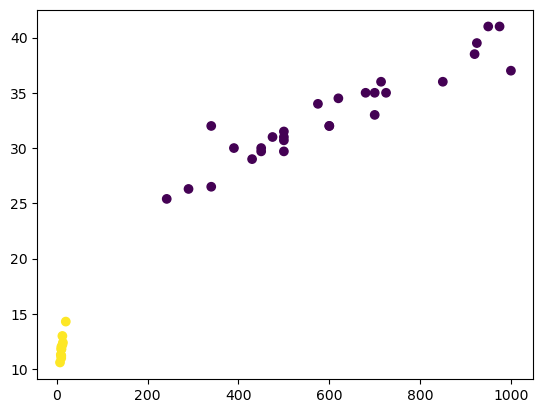

In [25]:
# 원본 데이터 시각화

plt.scatter(X_train.Weight, X_train.Length, c = y_train)
plt.show()

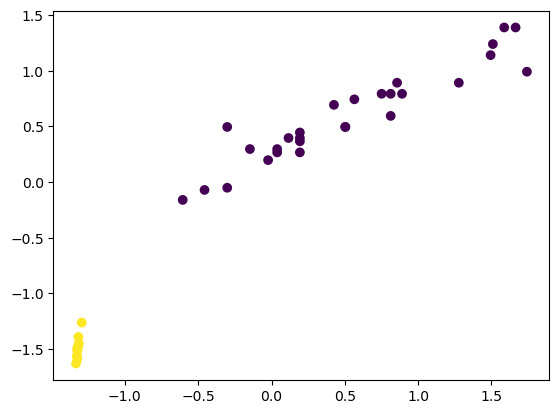

In [26]:
# 스케일된 데이터 시각화

plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c = y_train)
plt.show()

In [27]:
# 방법 1 : KNN 알고리즘
fishModel = KNeighborsClassifier()
fishModel

KNeighborsClassifier()

In [28]:
# 학습
fishModel.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [29]:
# 방법 2 : SVC
from sklearn.svm import SVC

fishModel2 = SVC()
fishModel2.fit(scaled_X_train, y_train)

SVC()

In [30]:
# 방법 3
from sklearn.linear_model import LogisticRegression

fishModel3 = LogisticRegression()
fishModel3.fit(scaled_X_train, y_train)

LogisticRegression()

(4) 학습 진행

In [31]:
# 방법 (1) : KNN 알고리즘
# 모델 성능 좌우하는 매개변수 => 하이퍼파라미터 : n_neighbors
# n_neighbors 즉 k 개수 : 1 ~ 전체 데이터 수
max_k = scaled_X_train.shape[0]

train_scoreList = []
test_scoreList = []
for k in range(1, max_k + 1):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(scaled_X_train, y_train)
    train_scoreList.append(model.score(scaled_X_train, y_train))
    test_scoreList.append(model.score(scaled_X_test, y_test))
#fishModel = KNeighborsClassifier(n_neighbors = )

In [32]:
# 학습 및 테스트 데이터에 대한 점수 확인
print(f'Train Score : {train_scoreList}')
print(f'Test Score : {test_scoreList}')

Train Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718]
Test Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


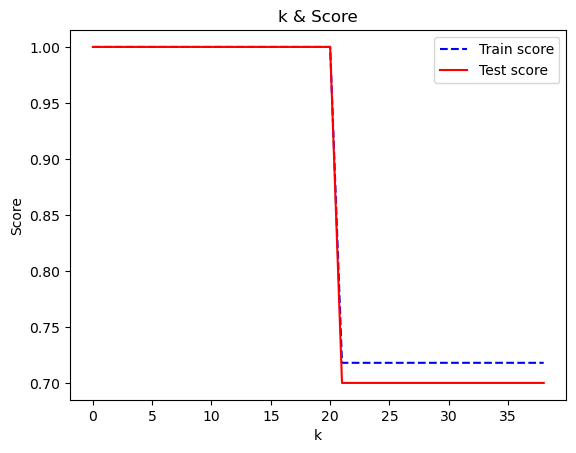

In [33]:
# k에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label = 'Train score')
plt.plot(test_scoreList, 'r', label = 'Test score')
plt.title('k & Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()

(5) 테스트 진행

In [34]:
print('KNN ', fishModel.score(scaled_X_test, y_test))
print('SVC ', fishModel2.score(scaled_X_test, y_test))
print('LogisticRegression ', fishModel3.score(scaled_X_test, y_test))

KNN  1.0
SVC  1.0
LogisticRegression  1.0


(6) 예측 <hr>

In [35]:
# 생선 무게, 길이 입력 받은 후 결과 반환
# input('생선의 무게, 길이 입력 (예 : 90, 20) :')

In [36]:
# 길이 25, 무게 160인 생선의 품종 예측
new_data = pd.DataFrame([[160, 25]], columns = twoFishDF.columns[1:])

new_data

,Weight,Length
0,160,25


In [37]:
# 피처스케일링 진행
scaled_new_data = scaler.transform(new_data)

In [38]:
# 예측
y_pre = fishModel.predict(scaled_new_data)